# Predicting Student Admissions
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:

GRE Scores (Test)
GPA Scores (Grades)
Class rank (1-4)
The dataset originally came from here: http://www.ats.ucla.edu/


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [141]:
os.chdir("D://Data Science_Machine Learning_Deep Learning/Data Science Python/Deep Learning/Udacity")
os.getcwd()
os.listdir()

['student_data.csv']

In [142]:
student_data = pd.read_csv("student_data.csv")
student_data.info()
student_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [145]:
#define a plot function
def admit_plot(data):
    temp = data.drop("admit", axis =1)
    X = np.array(temp)
    y = np.array(data['admit'])
    #X.shape, y.shape
    #admitted = np.array(student_data[student_data['admit']==1])[:,1:]
    admitted = X[np.argwhere(y==1)]
    #admitted == admitted_
    rejected = X[np.argwhere(y==0)]
    plt.figure(figsize = (14,5))
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 50,color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in  admitted], [s[0][1] for s in admitted], s= 50,color = "green", edgecolor = "k")
    plt.xlabel("Test (GRE)", fontsize =20)
    plt.ylabel("gpa", fontsize = 20)
    plt.title("Admitted vs Rejected", fontsize = 20)
    plt.legend()

No handles with labels found to put in legend.


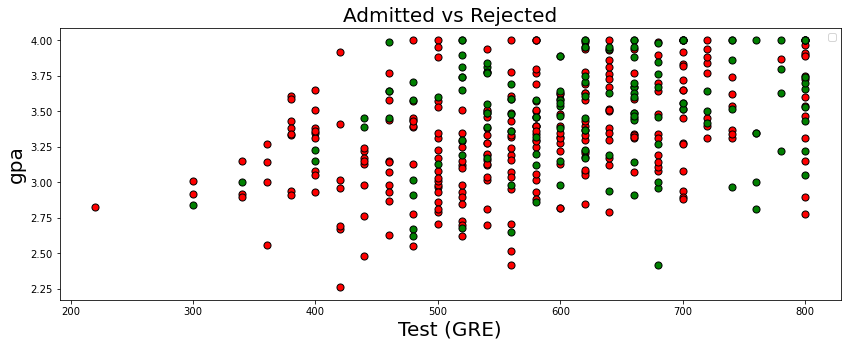

In [146]:
admit_plot(student_data)
plt.show()

No handles with labels found to put in legend.


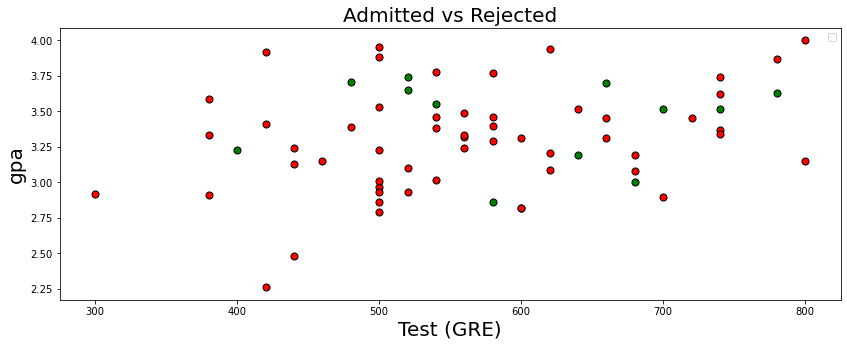

In [147]:
admit_plot(student_data[student_data['rank']==4])

In [159]:
#one hot encoding for the rank data
admission_data = pd.get_dummies(student_data['rank'],prefix= 'rank',drop_first= True)
X = pd.concat((student_data[['gre','gpa']],admission_data), axis =1)
X.head(2)
#admi

,gre,gpa,rank_2,rank_3,rank_4
0,380,3.61,0,1,0
1,660,3.67,0,1,0


In [162]:
#scaling the data to bring it all in the same scale
from sklearn.preprocessing import StandardScaler
processed_data = X.copy()
scaled = StandardScaler()
scaled_data = scaled.fit_transform(processed_data)
scaled_data.shape
scaled_data[:10]

array([[-1.80026271e+00,  5.79072211e-01, -7.78733396e-01,
         1.51848119e+00, -4.48554569e-01],
       [ 6.26668242e-01,  7.36929243e-01, -7.78733396e-01,
         1.51848119e+00, -4.48554569e-01],
       [ 1.84013372e+00,  1.60514292e+00, -7.78733396e-01,
        -6.58552774e-01, -4.48554569e-01],
       [ 4.53316031e-01, -5.25927010e-01, -7.78733396e-01,
        -6.58552774e-01,  2.22938316e+00],
       [-5.86797234e-01, -1.20997415e+00, -7.78733396e-01,
        -6.58552774e-01,  2.22938316e+00],
       [ 1.49342930e+00, -1.02580761e+00,  1.28413653e+00,
        -6.58552774e-01, -4.48554569e-01],
       [-2.40092812e-01, -1.07842662e+00, -7.78733396e-01,
        -6.58552774e-01, -4.48554569e-01],
       [-1.62691050e+00, -8.15331569e-01,  1.28413653e+00,
        -6.58552774e-01, -4.48554569e-01],
       [-4.13445023e-01,  2.63095053e-04, -7.78733396e-01,
         1.51848119e+00, -4.48554569e-01],
       [ 9.73372664e-01,  1.39466687e+00,  1.28413653e+00,
        -6.58552774e-01

In [165]:
#import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1947)

In [167]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [169]:
y_pred = logreg.predict(X_test)


In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.69

In [178]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [27,  5]], dtype=int64)

In [183]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.70      0.94      0.81        68\n           1       0.56      0.16      0.24        32\n\n    accuracy                           0.69       100\n   macro avg       0.63      0.55      0.52       100\nweighted avg       0.66      0.69      0.63       100\n'

In [174]:
logreg.coef_

array([[ 0.00264694,  0.61726005, -0.51716678, -0.87613288, -1.42321269]])

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
steps = [("scaler",StandardScaler()), ("model", DecisionTreeClassifier(max_depth= 5))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_train)
score = accuracy_score(y_train, y_pred)
score

0.75

In [214]:
#Applying 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier
classifiers = [LogisticRegression(), DecisionTreeClassifier(max_depth=5), RandomForestClassifier(n_estimators=10, max_depth=5),
               GradientBoostingClassifier(n_estimators=10, max_depth=5), KNeighborsClassifier(),
               XGBRFClassifier(n_estimators = 10,  objective='binary:logistic',use_label_encoder=False)]
for classifier in classifiers:
    steps = [("scaler",StandardScaler()), ("model", classifier)]
    pipe = Pipeline(steps=steps)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    print("Accuracy Score for {} model is : {}".format(classifier,score))

Accuracy Score for LogisticRegression() model is : 0.71
Accuracy Score for DecisionTreeClassifier(max_depth=5) model is : 0.75
Accuracy Score for RandomForestClassifier(max_depth=5, n_estimators=10) model is : 0.81
Accuracy Score for GradientBoostingClassifier(max_depth=5, n_estimators=10) model is : 0.79
Accuracy Score for KNeighborsClassifier() model is : 0.7566666666666667
[16:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score for XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constrai

In [212]:
help(XGBRFClassifier)

Help on class XGBRFClassifier in module xgboost.sklearn:

class XGBRFClassifier(XGBClassifier)
 |  XGBRFClassifier(*, learning_rate=1, subsample=0.8, colsample_bynode=0.8, reg_lambda=1e-05, use_label_encoder=True, **kwargs)
 |  
 |  scikit-learn API for XGBoost random forest classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of trees in random forest to fit.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
 |          code, we recommend that you set this parameter to False.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |   